In [186]:
# Momenton Data Challenge
import pandas as pd
import numpy as np

encoding='latin1'

In [187]:
# Create dataframe from movies.dat file 
# Assign column names. Extract year from dat file and create list of movie genres.

movies_df=pd.read_csv('https://raw.githubusercontent.com/momenton/momenton-code-test-movietweetings/master/snapshots/100K/movies.dat',sep='::',engine='python',header=None,encoding=encoding)
movies_df.columns=['movie_id','movie_name','genre']
movies_df["release_year"]=movies_df['movie_name'].str.extract('.*\(([0-9]*)\).*')
movies_df['genre']=movies_df['genre'].str.split('|')
del movies_df['movie_name']

In [188]:
# Create dataframe from ratings.dat file 
# Assign column names and delete unnecessary columns.

ratings_df=pd.read_csv('https://raw.githubusercontent.com/momenton/momenton-code-test-movietweetings/master/snapshots/100K/ratings.dat',sep = '::',engine='python',header=None,encoding=encoding)
ratings_df.columns=["user_id","movie_id","rating","rating_ts"]
del ratings_df['rating_ts']


In [192]:
# Join ratings_df with movies_df based on "movie_id" to get the genre and year associated with each movie_id
# Group the dataframe on genre and release_year to get the count of all movie ratings based on Genre and year.

movie_ratings_merge_df=ratings_df.merge(movies_df, on='movie_id', how='inner')
movie_ratings_merge_df=movie_ratings_merge_df.explode('genre').dropna()
movie_insights_df=movie_ratings_merge_df.groupby(['genre','release_year'],as_index=False)['rating'].count()
print(movie_insights_df.tail(20))

        genre release_year  rating
1657  Western         1993      12
1658  Western         1994      16
1659  Western         1995       9
1660  Western         1996       3
1661  Western         1997       1
1662  Western         1998       9
1663  Western         1999       3
1664  Western         2000       3
1665  Western         2002       2
1666  Western         2003      11
1667  Western         2004       7
1668  Western         2005       9
1669  Western         2006       2
1670  Western         2007      58
1671  Western         2008       1
1672  Western         2009       1
1673  Western         2010      37
1674  Western         2011      57
1675  Western         2012     857
1676  Western         2013     347


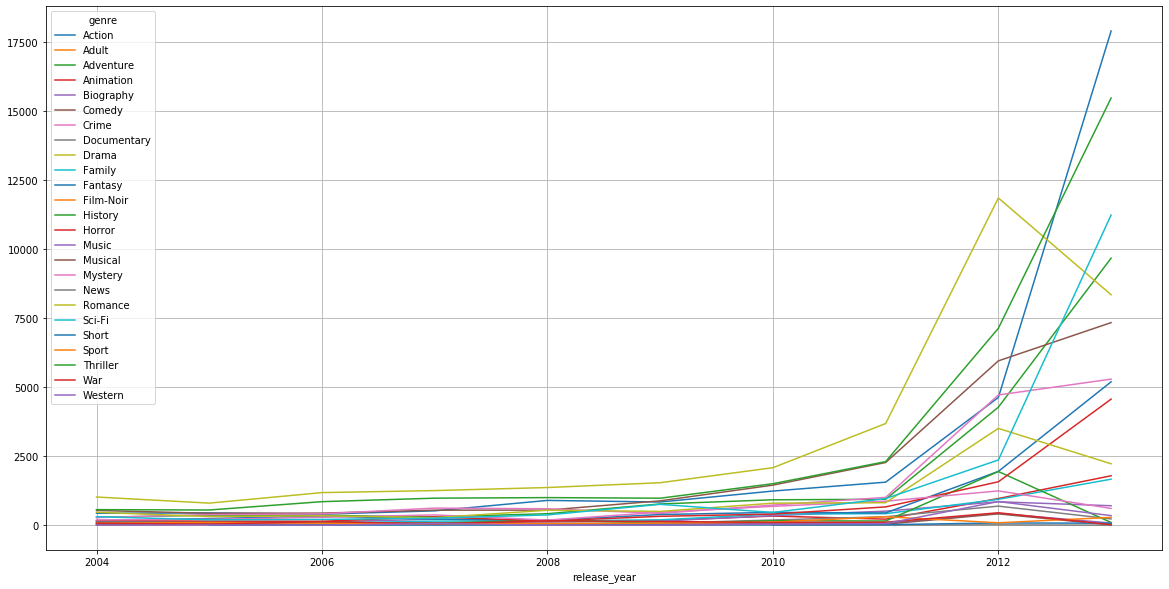

In [190]:
# Derive insights to get the list of popular genres based on year for the past decade [10 years]

movie_insights_pivot=movie_insights_df.pivot(index='release_year',columns='genre', values='rating')
movie_insights_pivot[-10:].plot(figsize=(20,10), grid=True)